![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [54]:
import pandas as pd
import seaborn as sns

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [64]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [ ]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [ ]:
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [ ]:
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
42,13.94,3.06,Male,No,Sun,Dinner,2
226,10.09,2.00,Female,Yes,Fri,Lunch,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
122,14.26,2.50,Male,No,Thur,Lunch,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [4]:
tips['tip'].agg(['min', 'max'])

min     1.0
max    10.0
Name: tip, dtype: float64

**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [5]:
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

**List of unique values in column `time`**

In [6]:
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [9]:
tips.shape

(244, 7)

**How many man/woman paid for the dish?**


In [13]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

**What is the percentage of smoker table and their revenue?**

In [24]:
tips.smoker.value_counts(normalize=True)*100
tips.loc[tips['smoker']=='Yes', 'total_bill'].sum()

1930.3400000000001

**List 3 tables that have the most expensive bill**

In [38]:
tips.total_bill.nlargest(3)

170    50.81
212    48.33
59     48.27
Name: total_bill, dtype: float64

### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [39]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [52]:
x = tips.groupby('smoker').sum()
x['bill_per_size'] = x['total_bill']/x['size']
x['tip_per_size'] = x['tip']/x['size']
x

,total_bill,tip,size,bill_per_size,tip_per_size
smoker,,,,,
Yes,1930.34,279.81,224,8.617589,1.249152
No,2897.43,451.77,403,7.189653,1.121017


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

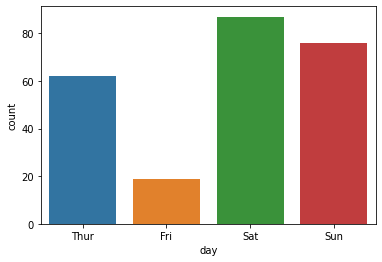

In [67]:
sns.countplot(x = "day", data=tips)

**Visualize # of smoker and non-smoker tables**

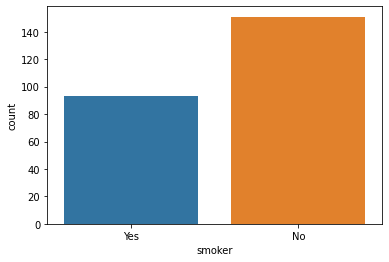

In [68]:
sns.countplot(x = "smoker", data=tips)

**Visualize # of male/female customers who pay**

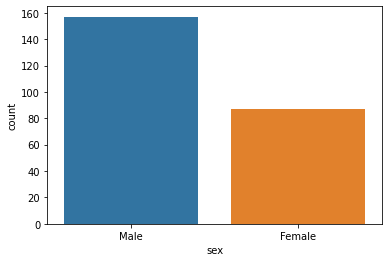

In [69]:
sns.countplot(x = "sex", data=tips)

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

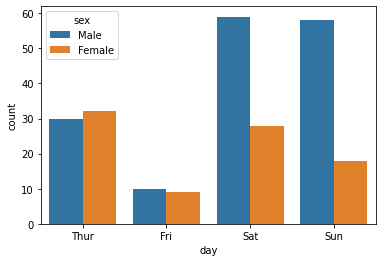

In [70]:
sns.countplot(x = "day", data=tips, hue = 'sex')

**Analyze the # of tables in different time (lunch or dinner) and days**

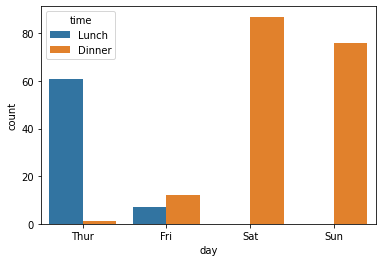

In [71]:
sns.countplot(x = "day", data=tips, hue = "time")

**Example: Visualize the distribution of the total bill**


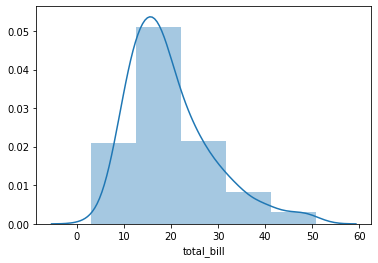

In [72]:
sns.distplot(tips['total_bill'], bins=5)

**Visualize the distribution of the tip**

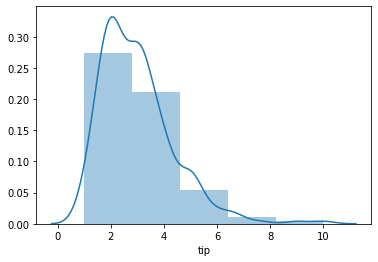

In [73]:
sns.distplot(tips['tip'], bins=5)

**Example: Scatter plot of tip and total bill**

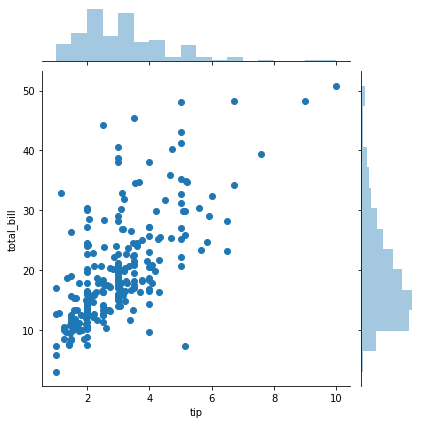

In [74]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

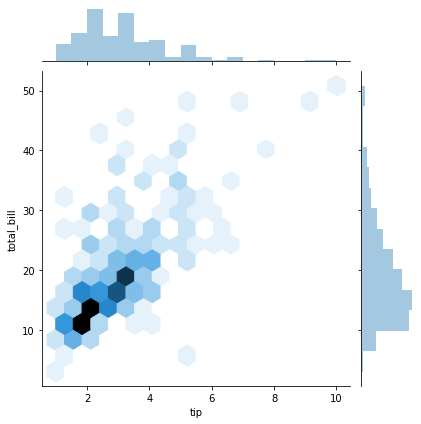

In [77]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind = 'hex')

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

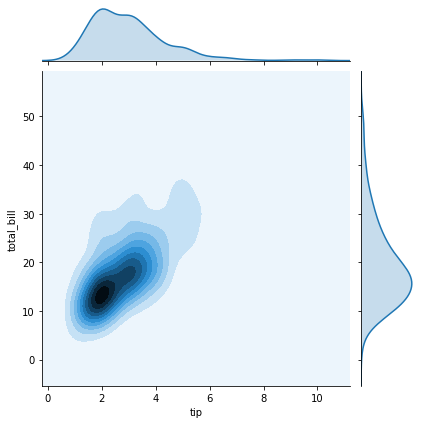

In [78]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind = 'kde')

**Analyze the relationship between `size` and `tip`**

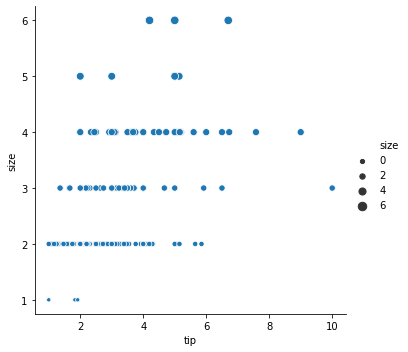

In [84]:
sns.relplot(x='tip', y='size', data=tips, size = 'size')

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

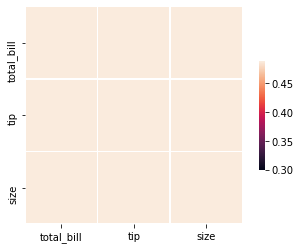

In [88]:
corr = tips.corr()
sns.heatmap(corr, vmax=.3,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

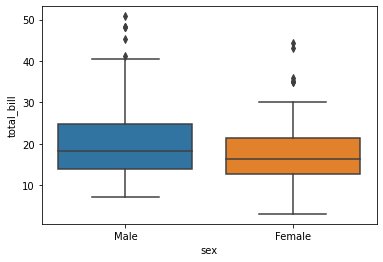

In [92]:
sns.boxplot(x=tips["sex"], y=tips["total_bill"])


**Implement `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

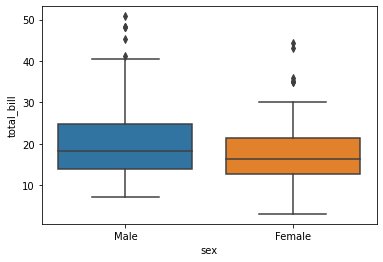

In [93]:
sns.boxplot(x=tips["sex"], y=tips["total_bill"])


**Add `hue='smoker'` to the previous `boxplot()`**

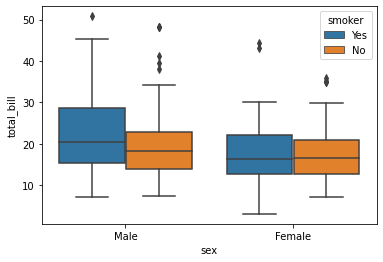

In [95]:
sns.boxplot(x=tips["sex"], y=tips["total_bill"], hue = tips['smoker'])


**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

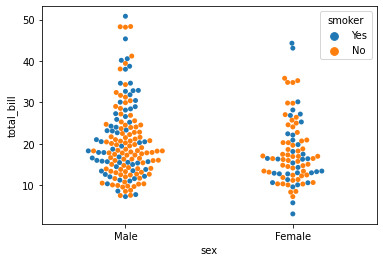

In [96]:
sns.swarmplot(x=tips["sex"], y=tips["total_bill"], hue = tips['smoker'])

**Implement previous chart with `violinplot()`**

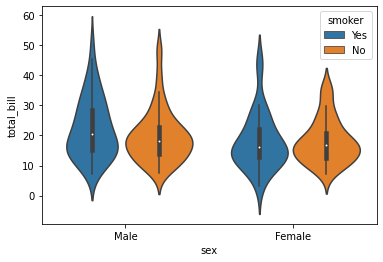

In [97]:
sns.violinplot(x=tips["sex"], y=tips["total_bill"], hue = tips['smoker'])

### Bonus

**Total revenue per day**

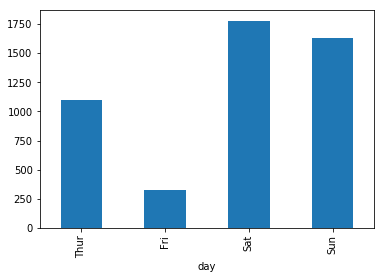

In [ ]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

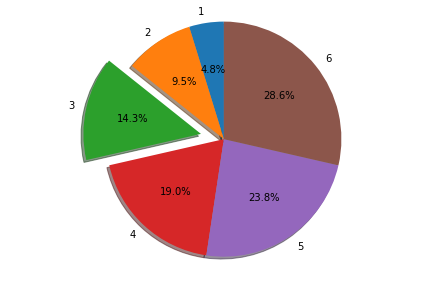

In [ ]:
# Pie chart
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
f, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Great Job!!